# 2. Q-Learning

## 2.1 Learning from experts

In [227]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from tic_env import TictactoeEnv
from Q_learning import eps_policy, eps_policy_self_practice
from helpers import render_grid_with_q_values, format_val
import pickle
env = TictactoeEnv()
Train=True

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### **Question 1**: Plot average reward for every 250 games during training – i.e. after the 50th game, plot the average reward of the first 250 games, after the 100th game, plot the average reward of games 51 to 100, etc. Does the agent learn to play Tic Tac Toe?

In [228]:
train_q1 = True
if Train and train_q1:
    eps_agents = np.arange(0,1,0.1)
    rewards = []
    for eps_agent in eps_agents:
        print('Started learning with eps_agent={:.1f}'.format(eps_agent))
        _, rewards_250 = eps_policy(env, Q_table=dict(), eps_agent=eps_agent)
        rewards.append(rewards_250)

    with open("./rewards/q1", "wb") as fp:
        pickle.dump((eps_agents, rewards), fp)
else:
    with open("./rewards/q1", "rb") as fp:
        eps_agents, rewards = pickle.load(fp)


Started learning with eps_agent=0.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 41.68s, played 20000 games
Started learning with eps_agent=0.1


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 44.54s, played 20000 games
Started learning with eps_agent=0.2


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 45.08s, played 20000 games
Started learning with eps_agent=0.3


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 43.43s, played 20000 games
Started learning with eps_agent=0.4


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 46.78s, played 20000 games
Started learning with eps_agent=0.5


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 44.88s, played 20000 games
Started learning with eps_agent=0.6


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 43.27s, played 20000 games
Started learning with eps_agent=0.7


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 43.07s, played 20000 games
Started learning with eps_agent=0.8


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 42.11s, played 20000 games
Started learning with eps_agent=0.9


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 41.98s, played 20000 games


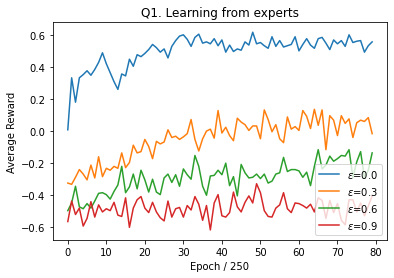

In [229]:
indices = [0, 3, 6, 9] #Corresponds to 0.0, 0.3, 0.6 and 0.9
for ind in indices:
    plt.plot(rewards[ind], label=r'$\epsilon$=' + '{:.1f}'.format(eps_agents[ind]))
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.title('Q1. Learning from experts')
plt.legend(loc='lower right')
plt.savefig('./plots/q1.png')
plt.show()


### 2.1.1 Decreasing exploration

#### **Question 2**: Plot average reward for every 250 games during training. Does decreasing $\epsilon$ help training compared to having a fixed $\epsilon$? What is the effect of n* ?


In [230]:
train_q2 = True
if Train and train_q2:
    expl_games = [1, 10, 100, 1000, 5000, 10000, 20000, 40000]
    expl_rewards = []
    for nb_expl_games in expl_games:
        print('Started learning with n*={}'.format(nb_expl_games))
        _, rewards_expl_250 = eps_policy(env, Q_table=dict(), decay_eps=True, expl_games=nb_expl_games)
        expl_rewards.append(rewards_expl_250)

    with open("./rewards/q2", "wb") as fp:
        pickle.dump((expl_rewards, expl_games), fp)
else:
    with open("./rewards/q2", "rb") as fp:
        expl_rewards, expl_games = pickle.load(fp)


Started learning with n*=1


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 43.41s, played 20000 games
Started learning with n*=10


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 43.39s, played 20000 games
Started learning with n*=100


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 42.60s, played 20000 games
Started learning with n*=1000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 45.21s, played 20000 games
Started learning with n*=5000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 161.40s, played 20000 games
Started learning with n*=10000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 233.64s, played 20000 games
Started learning with n*=20000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 226.37s, played 20000 games
Started learning with n*=40000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 228.07s, played 20000 games


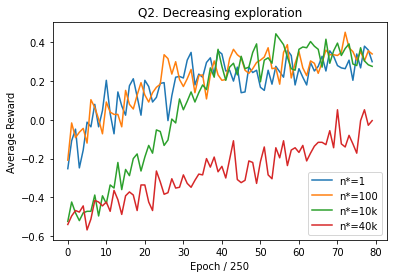

In [231]:
indices = [0, 2, 5, 7]
for ind in indices:
    plt.plot(expl_rewards[ind], label='n*=' + format_val(expl_games[ind]))
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.title('Q2. Decreasing exploration')
# plt.title('Average rewards after every 250 games with different values of n*')
plt.legend()
plt.savefig('./plots/q2.png')
plt.show()

#### **Question 3**: After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents – when measuring the ‘test’ performance, put $\epsilon$ = 0 and do not update the Q-values. Plot Mopt and Mrand over time. Describe the differences and the similarities between these curves and the ones of the previous question.


In [232]:
train_q3 = True
if Train and train_q3:
    expl_games = [1, 10, 100, 1000, 5000, 10000, 20000, 40000]
    eps_vs_opt_rewards = []
    eps_vs_rnd_rewards = []
    for nb_expl_games in expl_games:
        print('Started learning with n*={}'.format(nb_expl_games))
        _, M_opts, M_rnds = eps_policy(env, Q_table=dict(), decay_eps=True, expl_games=nb_expl_games, eval_every=250)
        eps_vs_opt_rewards.append(M_opts)
        eps_vs_rnd_rewards.append(M_rnds)

    with open("./rewards/q3", "wb") as fp:
        pickle.dump((eps_vs_opt_rewards, eps_vs_rnd_rewards, expl_games), fp)
else:
    with open("./rewards/q3", "rb") as fp:
        eps_vs_opt_rewards, eps_vs_rnd_rewards, expl_games = pickle.load(fp)



Started learning with n*=1


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 797.61s, played 20000 games
Started learning with n*=10


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 320.18s, played 20000 games
Started learning with n*=100


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 332.13s, played 20000 games
Started learning with n*=1000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 793.57s, played 20000 games
Started learning with n*=5000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 454.38s, played 20000 games
Started learning with n*=10000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 243.05s, played 20000 games
Started learning with n*=20000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 244.81s, played 20000 games
Started learning with n*=40000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 218.02s, played 20000 games


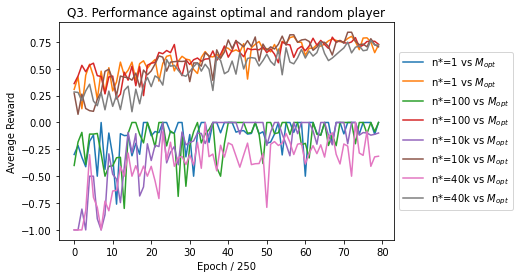

In [233]:
indices = [0, 2, 5, 7]
for ind in indices:
    plt.plot(eps_vs_opt_rewards[ind], label='n*=' + format_val(expl_games[ind]) + ' vs ' + r"$M_{opt}$")
    plt.plot(eps_vs_rnd_rewards[ind], label='n*=' + format_val(expl_games[ind]) + ' vs ' + r"$M_{opt}$")
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.title('Q3. Performance against optimal and random player')
plt.savefig('./plots/q3.png', bbox_inches='tight')
plt.show()

### 2.1.2 Good expoerts and bad experts

In [234]:
best_expl_games = 10000

#### **Question 4**: After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for your agents – for each value of $\epsilon_{opt}$. Plot $M_{opt}$ and $M_{rand}$ over time. What do you observe? How can you explain it?


In [235]:
train_q4 = True
if Train and train_q4:
    eps_opts = np.arange(0,1,0.1)
    eps_rewards = []
    eps_vs_opt_rewards = []
    eps_vs_rnd_rewards = []
    for eps_opt in eps_opts:
        print('Started learning with eps_opt={:.1f}'.format(eps_opt))
        _, M_opts, M_rnds = eps_policy(env, Q_table=dict(), eps_opt=eps_opt, decay_eps=True, expl_games=best_expl_games, eval_every=250)
        eps_vs_opt_rewards.append(M_opts)
        eps_vs_rnd_rewards.append(M_rnds)

    with open("./rewards/q4", "wb") as fp:
        pickle.dump((eps_vs_opt_rewards, eps_vs_rnd_rewards, eps_opts), fp)
else:
    with open("./rewards/q4", "rb") as fp:
        eps_vs_opt_rewards, eps_vs_rnd_rewards, eps_opts = pickle.load(fp)

Started learning with eps_opt=0.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 263.86s, played 20000 games
Started learning with eps_opt=0.1


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 259.55s, played 20000 games
Started learning with eps_opt=0.2


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 243.20s, played 20000 games
Started learning with eps_opt=0.3


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 228.47s, played 20000 games
Started learning with eps_opt=0.4


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 225.65s, played 20000 games
Started learning with eps_opt=0.5


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 212.58s, played 20000 games
Started learning with eps_opt=0.6


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 208.86s, played 20000 games
Started learning with eps_opt=0.7


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 196.77s, played 20000 games
Started learning with eps_opt=0.8


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 186.91s, played 20000 games
Started learning with eps_opt=0.9


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 174.01s, played 20000 games


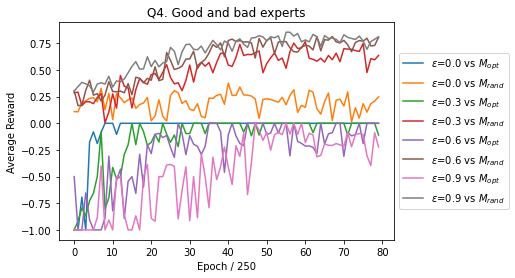

In [236]:
indices=[0, 3, 6, 9]
for ind in indices:
    plt.plot(eps_vs_opt_rewards[ind], label=r"$\epsilon$=" + '{:.1f} vs '.format(eps_opts[ind]) + r"$M_{opt}$")
    plt.plot(eps_vs_rnd_rewards[ind], label=r"$\epsilon$=" + '{:.1f} vs '.format(eps_opts[ind]) + r"$M_{rand}$")
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.title('Q4. Good and bad experts')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('./plots/q4.png', bbox_inches='tight')
plt.show()

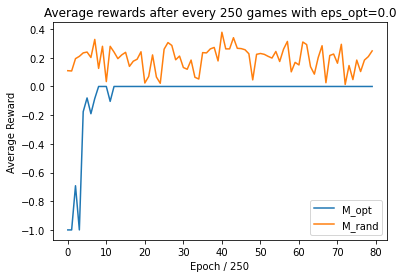

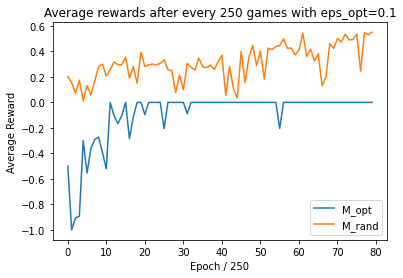

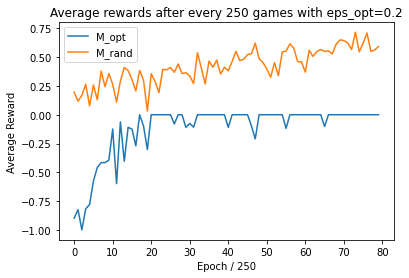

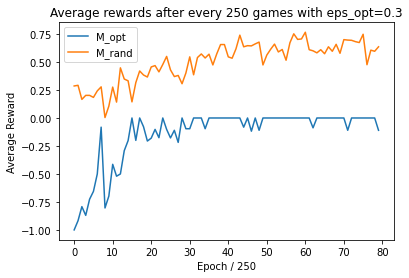

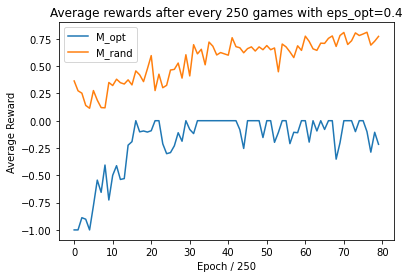

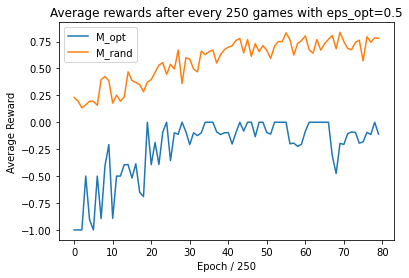

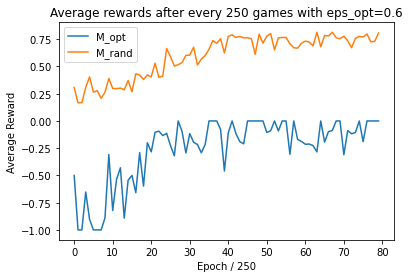

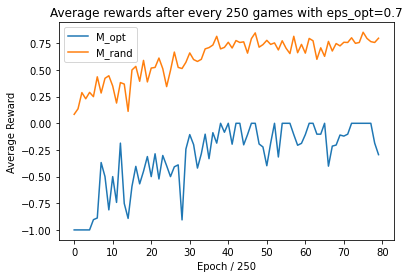

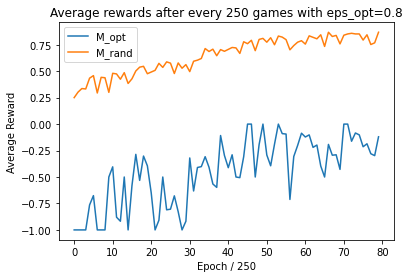

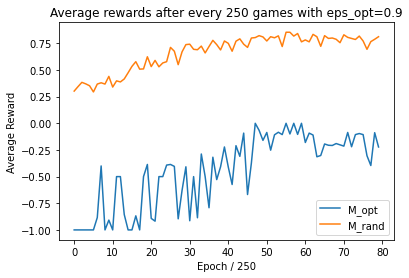

In [237]:
for idx, eps_opt in enumerate(eps_opts):
    plt.plot(eps_vs_opt_rewards[idx], label='M_opt')
    plt.plot(eps_vs_rnd_rewards[idx], label='M_rand')
    plt.legend()
    plt.xlabel('Epoch / 250')
    plt.ylabel('Average Reward')
    plt.title('Average rewards after every 250 games with eps_opt={:.1f}'.format(eps_opt))
    plt.show()

#### **Question 5**: What are the highest values of $M_{opt}$ and $M_{rand}$ that you could achieve after playing 20’000 games?

In [238]:
print('Best M_opt after 20000 games: {:.3f}'.format(np.max(eps_vs_opt_rewards)))
print('Best M_rnd after 20000 games: {:.3f}'.format(np.max(eps_vs_rnd_rewards)))

Best M_opt after 20000 games: 0.000
Best M_rnd after 20000 games: 0.868


The highest $\begin{aligned}M_{opt}\end{aligned}$ is equal to 0. This is normal and to be awaited since if correctly played, a player never losses. Thus the optimal player will never loose. If now the agent has played and learned enough, then he will also never loose. This will result in all games ending in a draw.

The highest $\begin{aligned}M_{rand}\end{aligned}$ is equal to 0.882. This value is pretty high but is not out of the ordinary since if correctly played, a player never losses. Thus the optimal player will never loose. If now the agent has played and learned enough, then he will also never loose. This will result in all games ending in either a win for the agent or a draw.



#### **Question 6**: Assume that Agent 1 learns by playing against Opt(0) and find the optimal Q-values Q1(s, a). In addition, assume that Agent 2 learns by playing against Opt(1) and find the optimal Q-values Q2(s, a). Do Q1(s, a) and Q2(s, a) have the same values?

The answer is no. Since Agent 1 plays against an optimal player who always chooses the best action, the game always ends in either a draw or a loose for Agent 1. This means that all the Q-values of Agent 1 will be smaller or equal 0 since the only possibility to obtain a positive reward is by winning a game. On the other hand, Agent 2 will win most of its games and never loose once he has learned the optimal Q-values. Thus he will have Q-values that are greater then 0.

### Learning by self-practive

#### **Question 7**:  After every 250 games during training, compute the ‘test’ $M_{opt}$ and $M_{rand}$ for different values of $\epsilon$ ∈ [0, 1). Does the agent learn to play Tic Tac Toe? What is the effect of $\epsilon$?

In [239]:
train_q7 = True
if Train and train_q7:
    eps_agents = np.arange(0, 1, 0.1)
    eps_vs_opt_rewards = []
    eps_vs_rnd_rewards = []
    for eps_agent in eps_agents:
        print('Started learning with eps_agent={:.1f}'.format(eps_agent))
        _, M_opts, M_rnds = eps_policy_self_practice(env, Q_table=dict(), eps_agents=eps_agent)
        eps_vs_opt_rewards.append(M_opts)
        eps_vs_rnd_rewards.append(M_rnds)

    with open("./rewards/q7", "wb") as fp:
        pickle.dump((eps_vs_opt_rewards, eps_vs_rnd_rewards, eps_agents), fp)
else:
    with open("./rewards/q7", "rb") as fp:
        eps_vs_opt_rewards, eps_vs_rnd_rewards, eps_agents = pickle.load(fp)

Started learning with eps_agent=0.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 168.18s, played 20000 games
Started learning with eps_agent=0.1


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 173.74s, played 20000 games
Started learning with eps_agent=0.2


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 178.63s, played 20000 games
Started learning with eps_agent=0.3


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 174.33s, played 20000 games
Started learning with eps_agent=0.4


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 170.03s, played 20000 games
Started learning with eps_agent=0.5


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 166.74s, played 20000 games
Started learning with eps_agent=0.6


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 167.15s, played 20000 games
Started learning with eps_agent=0.7


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 165.98s, played 20000 games
Started learning with eps_agent=0.8


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 174.05s, played 20000 games
Started learning with eps_agent=0.9


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 174.23s, played 20000 games


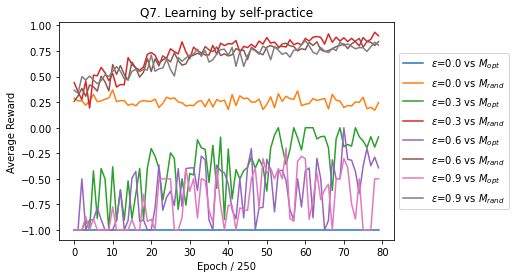

In [240]:
indices=[0, 3, 6, 9]
for ind in indices:
    plt.plot(eps_vs_opt_rewards[ind], label=r"$\epsilon$=" + '{:.1f} vs '.format(eps_opts[ind]) + r"$M_{opt}$")
    plt.plot(eps_vs_rnd_rewards[ind], label=r"$\epsilon$=" + '{:.1f} vs '.format(eps_opts[ind]) + r"$M_{rand}$")
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.title('Q7. Learning by self-practice')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.savefig('./plots/q7.png', bbox_inches='tight')
plt.show()

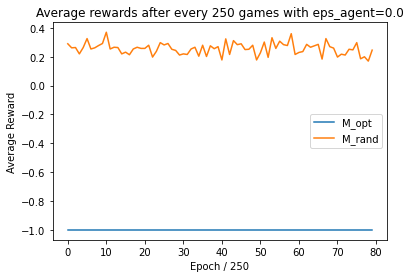

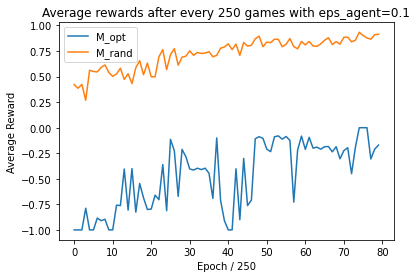

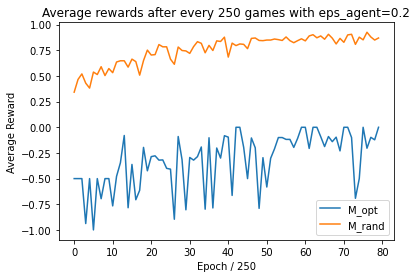

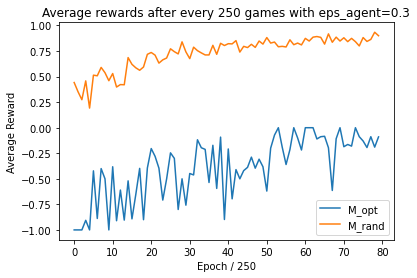

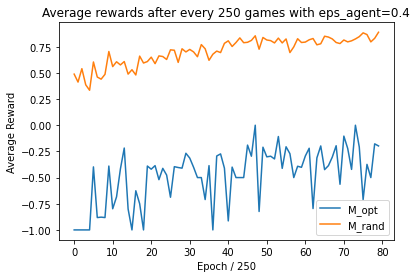

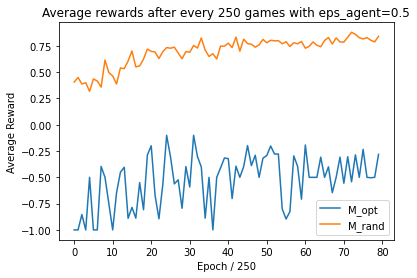

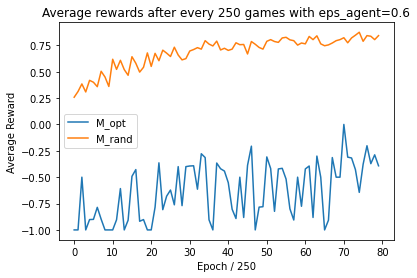

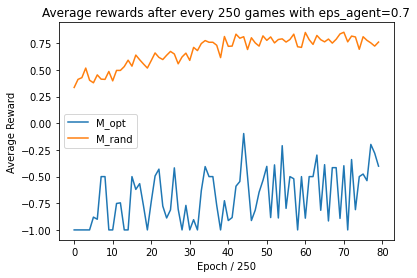

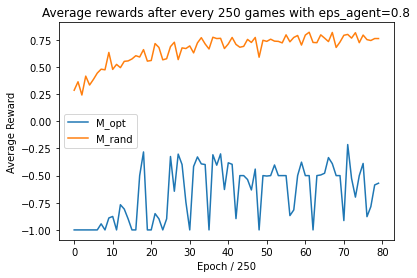

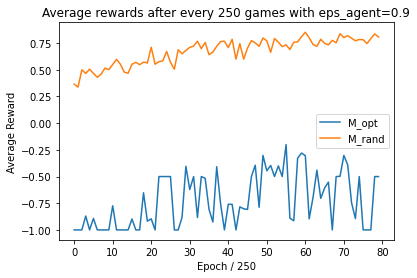

In [241]:
for idx, eps_agent in enumerate(eps_agents):
    plt.plot(eps_vs_opt_rewards[idx], label='M_opt')
    plt.plot(eps_vs_rnd_rewards[idx], label='M_rand')
    plt.legend()
    plt.xlabel('Epoch / 250')
    plt.ylabel('Average Reward')
    plt.title('Average rewards after every 250 games with eps_agent={:.1f}'.format(eps_agent))
    plt.show()

#### **Question 8**: After every 250 games during training, compute the ‘test’ Mopt and Mrand for your agents. Does decreasing $\epsilon$ help training compared to having a fixed $\epsilon$? What is the effect of n*?


In [242]:
train_q8 = True
if Train and train_q8:
    expl_games = [1, 10, 100, 1000, 5000, 10000, 20000, 40000]
    eps_vs_opt_rewards = []
    eps_vs_rnd_rewards = []
    for expl_game in expl_games:
        print('Started learning with expl_game={:.1f}'.format(expl_game))
        Q_table, M_opts, M_rnds = eps_policy_self_practice(env, Q_table=dict(), decay_eps=True, expl_games=expl_game)
        eps_vs_opt_rewards.append(M_opts)
        eps_vs_rnd_rewards.append(M_rnds)

    with open("./rewards/q8", "wb") as fp:
        pickle.dump((eps_vs_opt_rewards, eps_vs_rnd_rewards, expl_games), fp)
else:
    with open("./rewards/q8", "rb") as fp:
        eps_vs_opt_rewards, eps_vs_rnd_rewards, expl_games = pickle.load(fp)

Started learning with expl_game=1.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 189.97s, played 20000 games
Started learning with expl_game=10.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 183.90s, played 20000 games
Started learning with expl_game=100.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 178.27s, played 20000 games
Started learning with expl_game=1000.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 265.03s, played 20000 games
Started learning with expl_game=5000.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 246.12s, played 20000 games
Started learning with expl_game=10000.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 40127.34s, played 20000 games
Started learning with expl_game=20000.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 553.19s, played 20000 games
Started learning with expl_game=40000.0


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 556.19s, played 20000 games


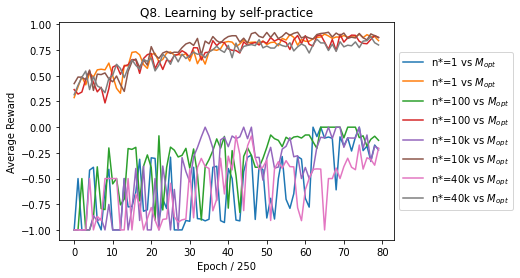

In [243]:
indices = [0, 2, 5, 7]
for ind in indices:
    plt.plot(eps_vs_opt_rewards[ind], label='n*=' + format_val(expl_games[ind]) + ' vs ' + r"$M_{opt}$")
    plt.plot(eps_vs_rnd_rewards[ind], label='n*=' + format_val(expl_games[ind]) + ' vs ' + r"$M_{opt}$")
plt.xlabel('Epoch / 250')
plt.ylabel('Average Reward')
plt.legend(loc='center left', bbox_to_anchor=(1,0.5))
plt.title('Q8. Learning by self-practice')
plt.savefig('./plots/q8.png', bbox_inches='tight')
plt.show()

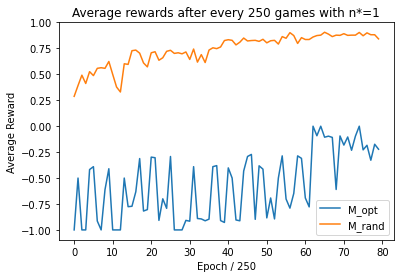

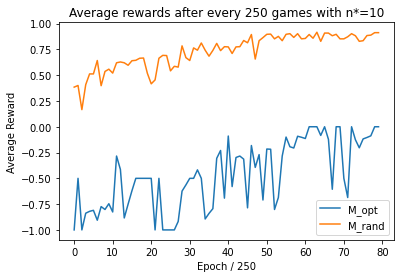

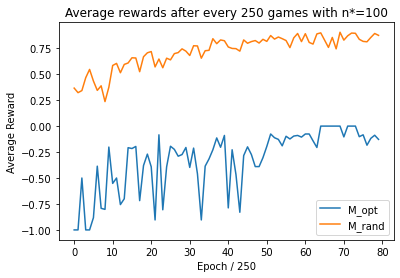

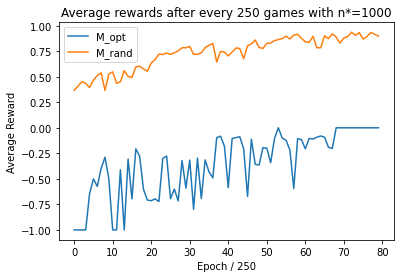

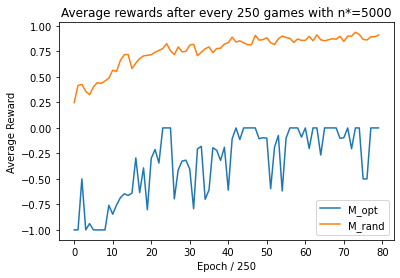

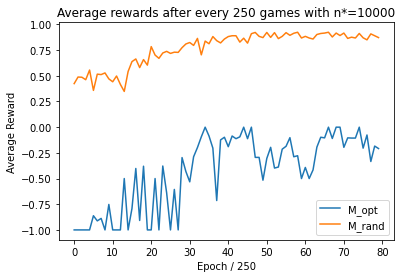

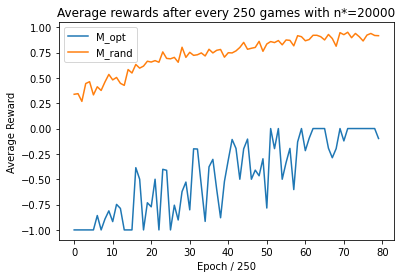

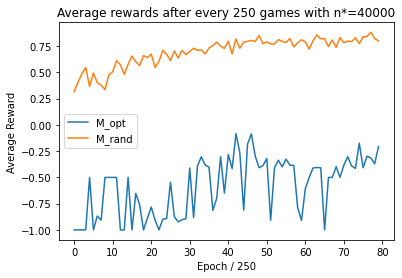

In [244]:
for idx, expl_game in enumerate(expl_games):
    plt.plot(eps_vs_opt_rewards[idx], label='M_opt')
    plt.plot(eps_vs_rnd_rewards[idx], label='M_rand')
    plt.legend()
    plt.xlabel('Epoch / 250')
    plt.ylabel('Average Reward')
    plt.title('Average rewards after every 250 games with n*={}'.format(expl_game))
    plt.show()

#### Question 9: What are the highest values for Mopt and Mrand achieved after 20 000 games?

In [245]:
best_M_opt = max(max(eps_vs_opt_rewards))
best_M_rand = max(max(eps_vs_rnd_rewards))
print('Best M_opt: {}'.format(best_M_opt))
print('Best M_rand: {:.4f}'.format(best_M_rand))

Best M_opt: 0.0
Best M_rand: 0.9240


#### Question 10: 

In [246]:
import seaborn as sns

In [247]:
def plot_grids_heatmap(Q_table, grids):  
    fig = plt.figure(figsize=(20, 5))
    axes = [fig.add_subplot(131), fig.add_subplot(132), fig.add_subplot(133)]

    for idx, grid in enumerate(grids):
        state = tuple(grid.flatten())
        if sum(state) < 0:
            raise ValueError('An invalid grid has been chosen. Player X -> 1 always starts.')
        if sum(state) > 1:
            raise ValueError('An invalid grid has been chosen. The two players X -> 1 and O -> -1 always play one after the other.')
        q_values = np.ones(grid.shape)*-1
        try:
            for key in Q_table[state]:
                q_values[key] = Q_table[state][key]
            sns.heatmap(q_values, ax=axes[idx], square=True)
            #axes[idx].title.set_text('{} <-> {}'.format(grid, q_values))
            axes[idx].set_title(render_grid_with_q_values(grid, q_values), loc='center')
        except:
            raise ValueError('The game has already been finished or the current state has not been encountered.')

In [248]:
best_expl_games = 10000
train_q10 = True
if Train and train_q10:
    print('Started learning with expl_game={}'.format(best_expl_games))
    Q_table, _, _ = eps_policy_self_practice(env, Q_table=dict(), decay_eps=True, expl_games=best_expl_games, eval_every=-1)

    with open("./rewards/q10", "wb") as fp:
        pickle.dump((Q_table), fp)
else:
    with open("./rewards/q10", "rb") as fp:
        Q_table = pickle.load(fp)

Started learning with expl_game=10000


  0%|          | 0/20000 [00:00<?, ?it/s]

Learning finished after 74.73s, played 20000 games


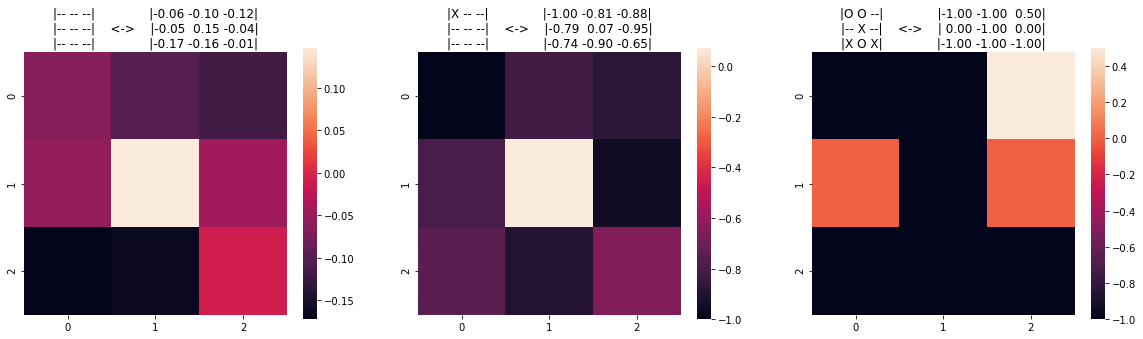

In [249]:
grid0 = np.array([[0,0,0],
                [0,0,0],
                [0,0,0]])

grid1 = np.array([[1,0,0],
                [0,0,0],
                [0,0,0]])

grid2 = np.array([[-1,-1,0],
                [0,1,0],
                [1,-1,1]])

plot_grids_heatmap(Q_table, [grid0, grid1, grid2])
plt.savefig('./plots/q10',  bbox_inches='tight')